# Übung zu kMeans

In der Vorlesung wurde das Cluster-Verfahren kMeans besprochen. Dieses und zusätzliche Erweiterungen werden wir in dieser Übung implementieren.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math


Mit folgendem Code erzeugen wir ein Beispielcorpus mit 300 Beispielen und einer Merkmaledimension von zwei. Das Corpus kann in 4 Cluster eingeteilt werden.
Wir verwenden dieses zum Evaluieren unserer k-Means-Implementierung.

(300, 2)


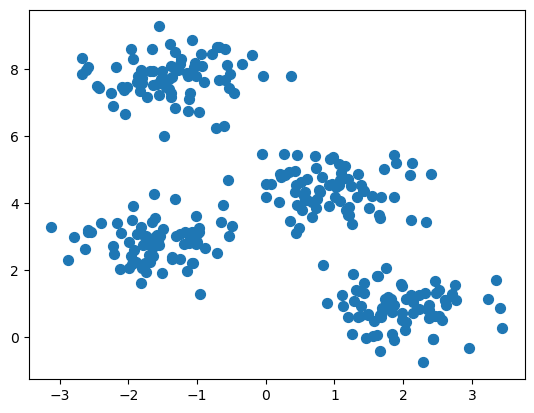

In [2]:
import sklearn
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], s=50);

## Implementieren Sie den k-Means Algorithmus

In [3]:
class MyKMeans:
    
    def __init__(self):
        cluster_centers_=[]
        
    def fitAndPredict(self, X, k):
        O=[] #Randomisierte Wahl von Startcentroiden
        for x in X:
            O.append(x)
        centroids = []
        np.random.shuffle(O)
        for i in range(k):
            centroids.append(O[i])
        D = {}
        changed = True
        X = tuple(map(tuple, X))
        while changed:
            changed = False
            for p in X: #Abspeichern der aktuell günstigsten Centroide zu jedem Knoten in D
                distances = {}
                for c in centroids:
                    distances[math.dist(p,c)]=c
                D[p]=distances[min(distances)]
            for i in range(len(centroids)):#Berechne Koordinaten von jedem neuen Centroid (Mittelwert aller zugewießenen Punkte)
                currentCentroid = centroids[i]
                allPointsWithCurrentCentroid=np.asarray([k for k, v in D.items() if v.all==currentCentroid.all])
                newCentroid=allPointsWithCurrentCentroid.mean(axis=0)
                if not(np.array_equal(currentCentroid, newCentroid)):
                    changed=True
                    centroids[i]=newCentroid
        labels=[]
        self.cluster_centers_=centroids
        for x in X:
            i=0
            for c in centroids:
                if(np.array_equal(c, D[x])):
                    labels.append(i)
                else:
                    i+=1
        return labels
test = MyKMeans()
y_kmeans = test.fitAndPredict(X, 4)
print(y_kmeans)


[2, 0, 1, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 0, 2, 1, 1, 2, 3, 3, 2, 2, 1, 3, 3, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1, 3, 3, 0, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3, 0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1, 3, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3, 3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1, 2, 3, 0, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0, 2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1, 3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 3, 2, 2, 1, 0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 0, 3, 2, 1, 2, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 0, 1, 1, 3, 2, 0, 3, 1, 0, 1, 2, 2, 3, 3, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3]


## Plotten sie die gefunden Cluster mit den zugehörigen Zentroiden

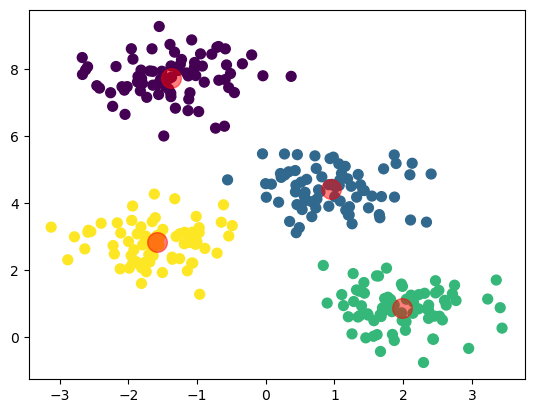

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
cl = test.cluster_centers_
centers=np.asarray(cl)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## In der Vorlesung haben wir ein Verfahren besprochen, mit dem das Problem der initialen Centroide gelöst werden kann. Implementieren sie dieses und Testen ihre k-Means-Erweiterung.

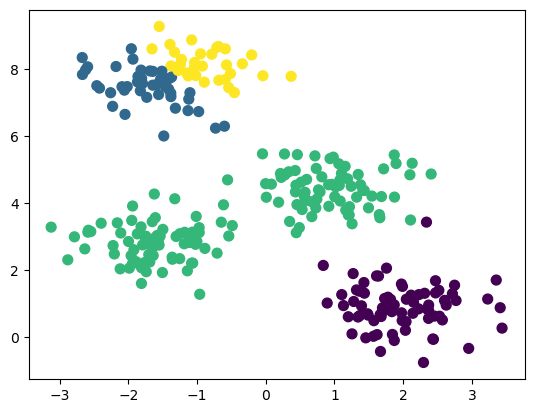

In [29]:
class MyImprovedKMeans:
    
    def calculateDissimilarity(self, X, labels, c):
        dis = 0
        for i in range(len(c)):
            points = []
            centroid = c[i]
            for l in labels:
                if(l==i):
                    points.append(X[i])
            var=0
            for p in points:
                var += (math.dist(p, centroid)*math.dist(p,centroid))
            dis += math.sqrt(var)
        return dis
    
    def optimizeKMeans(self, X, k, numTrials):
        kMeansCalc = MyKMeans()
        best=kMeansCalc.fitAndPredict(X,k)
        centroidsBest=np.asarray(kMeansCalc.cluster_centers_)
        for i in range(numTrials):
            C=kMeansCalc.fitAndPredict(X,k)
            centroidsTrial=np.asarray(kMeansCalc.cluster_centers_)
            if(self.calculateDissimilarity(X,C,centroidsTrial)<self.calculateDissimilarity(X, best, centroidsBest)):
                best=C
                centroidsBest=centroidsTrial
        return best
            
test2=MyImprovedKMeans()
y_kmeans=test2.optimizeKMeans(X, 4, 100)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

## Testen Sie ihr Verfahren mit einem Datensatz ihrer Wahl und analysieren Sie die Ergebnisse

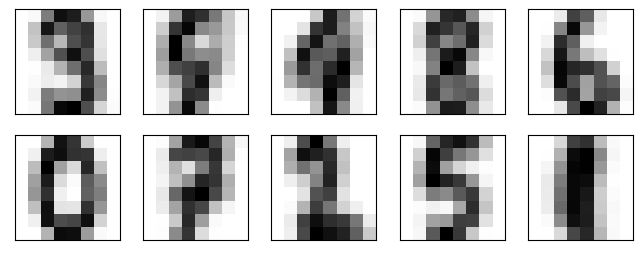

In [34]:
from sklearn.datasets import load_digits
digits=load_digits()
n_cluster=10
kmeans=MyKMeans()
clusters=kmeans.fitAndPredict(digits.data, n_cluster)
y=(int)(n_cluster/2)

fig, ax = plt.subplots(2, y, figsize=(8, 3))

centers = np.asarray(kmeans.cluster_centers_).reshape(n_cluster, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
